# Import library

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [49]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [36]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

In [50]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

<AxesSubplot:xlabel='Survived', ylabel='count'>

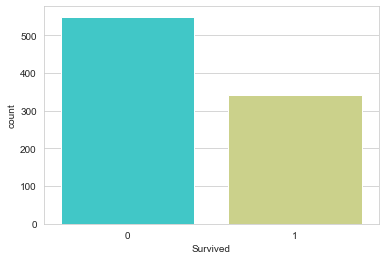

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='rainbow')

# Câu 1: Viết chương trình đánh giá độ chính xác của thuật toán hồi quy logistic trong bài toán dự báo Sự sống/chết (Survived) của hành khách lên tàu Titanic dựa trên Độ tuổi (Age) và Giá vé (Fare) mà họ đã mua trong 14 tổ hợp làm sạch dữ liệu sau

Initial logistic regression model

In [52]:
logmodel = LogisticRegression()

Create varible to store accuracy of model

In [53]:
accuracy_results = []


## 1.1 Without Outliers

### Mean

In [54]:
data = df.copy()

mean=data['Age'].mean()
data['Age']=data['Age'].fillna(mean)

In [55]:
rs_acc = np.zeros(10)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1),
                                                        data['Survived'], test_size=0.30, 
                                                        random_state=i)
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    rs_acc[i] = (accuracy_score(y_test, predictions))

accuracy_results.append(rs_acc.mean())

### Median

In [56]:
data = df.copy()

median=data['Age'].median()
data['Age']=data['Age'].fillna(median)

In [57]:
rs_acc = []

rs_acc = np.zeros(10)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1),
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=i)

    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    rs_acc[i] = (accuracy_score(y_test, predictions))

accuracy_results.append(rs_acc.mean())


### Mode

In [58]:
data = df.copy()

mode=data['Age'].mode()[0]
data['Age']=data['Age'].fillna(mode)


In [59]:

rs_acc = []

rs_acc = np.zeros(10)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1),
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=i)

    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    rs_acc[i] = (accuracy_score(y_test, predictions))

accuracy_results.append(rs_acc.mean())


### Random

In [60]:
data = df.copy()
random_samples = data['Age'].dropna().sample(n=data['Age'].isnull().sum(),random_state=0)
random_samples.index = data[data['Age'].isnull()].index

data.loc[data['Age'].isnull(), 'Age'] = random_samples

In [61]:

rs_acc = []

rs_acc = np.zeros(10)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1),
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=i)

    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    rs_acc[i] = (accuracy_score(y_test, predictions))

accuracy_results.append(rs_acc.mean())


### End of Dist

In [62]:
data = df.copy()
extreme_value = data.Age.mean() + 3*data.Age.std()
data['Age'].fillna(extreme_value, inplace=True)

In [63]:

rs_acc = []

rs_acc = np.zeros(10)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1),
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=i)

    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    rs_acc[i] = (accuracy_score(y_test, predictions))

accuracy_results.append(rs_acc.mean())


### Arbitrary

In [64]:
data = df.copy()
data['Age'].fillna(20, inplace=True)

In [65]:


rs_acc = []

rs_acc = np.zeros(10)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1),
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=i)

    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    rs_acc[i] = (accuracy_score(y_test, predictions))

accuracy_results.append(rs_acc.mean())


### New feature

In [66]:
data = df.copy()
data['Age_NAN']=np.where(data['Age'].isnull(),1,0)
data['Age'].fillna(data.Age.median(),inplace=True)

In [67]:
rs_acc = []

rs_acc = np.zeros(10)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1),
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=i)

    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    rs_acc[i] = (accuracy_score(y_test, predictions))

accuracy_results.append(rs_acc.mean())

In [68]:
print(accuracy_results)

[0.6529850746268656, 0.603731343283582, 0.603731343283582, 0.603731343283582, 0.603731343283582, 0.603731343283582, 0.603731343283582]


## With Outliers

Text(0, 0.5, 'No of passenger')

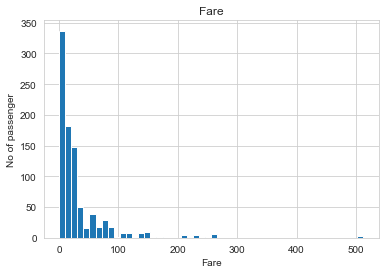

In [69]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [72]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-13.880374349943303
73.27860964406094
29.69911764705882


(None, None, None)

In [73]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [74]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [23]:
outliers_data=df.copy()
outliers_data.loc[outliers_data['Age']>=73,'Age']=73
outliers_data.loc[outliers_data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

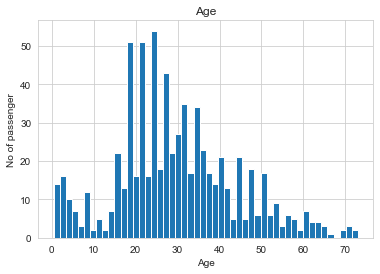

In [24]:
figure=outliers_data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

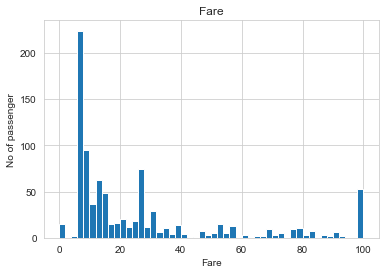

In [25]:
figure=outliers_data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

### Mean

In [26]:
data = outliers_data.copy()

mean=data['Age'].mean()
data['Age']=data['Age'].fillna(mean)

In [27]:
rs_acc = []

rs_acc = np.zeros(10)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1),
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=i)

    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    rs_acc[i] = (accuracy_score(y_test, predictions))

accuracy_results.append(rs_acc.mean())

              precision    recall  f1-score   support

           0       0.74      0.95      0.84       174
           1       0.82      0.39      0.53        94

    accuracy                           0.76       268
   macro avg       0.78      0.67      0.68       268
weighted avg       0.77      0.76      0.73       268

0.7574626865671642


### Median

In [28]:
data = outliers_data.copy()
median=data['Age'].median()
data['Age']=data['Age'].fillna(median)

In [29]:
rs_acc = []

rs_acc = np.zeros(10)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1),
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=i)

    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    rs_acc[i] = (accuracy_score(y_test, predictions))

accuracy_results.append(rs_acc.mean())


              precision    recall  f1-score   support

           0       0.67      0.91      0.77       160
           1       0.72      0.35      0.47       108

    accuracy                           0.68       268
   macro avg       0.70      0.63      0.62       268
weighted avg       0.69      0.68      0.65       268

